In [1]:
#Load and view the data
import numpy as np
import pandas as pd

data=pd.read_csv('C:/Users/xiuro/AppData/Local/Programs/Python/Python311/save/children anemia.csv')
print(data.head())
print("data's info:\n",data.info())
#print("describe of data:\n:", data.describe())
data.replace('',np.nan,inplace=True)
df = data.copy()
df.rename(columns={'Age in 5-year groups':'Age groups','Type of place of residence':'Residence type',
                   'Highest educational level': 'Education Level' , 'Wealth index combined': 'Wealth index','Births in last five years':'Births in last five years',
                   'Age of respondent at 1st birth':'Age of 1st birth',
                   'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)':'Hemoglobin level-altitude and smoking',
                   'Have mosquito bed net for sleeping (from household questionnaire)':'Mosquito net',
                   'Currently residing with husband/partner':'together with partner',
                   'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)':'Hemoglobin level-altitude',
                   'Taking iron pills, sprinkles or syrup':'Iron pills'}, inplace =True)
print(df.info())                   

# Missing values checking 
missing_values=df.isnull().sum()
print(missing_values)
#duplicated values checking and imputation
duplicated_values= df.duplicated().sum()
print(duplicated_values)
df = df.drop_duplicates()
print(df.info())

  Age in 5-year groups Type of place of residence Highest educational level  \
0                40-44                      Urban                    Higher   
1                35-39                      Urban                    Higher   
2                25-29                      Urban                    Higher   
3                25-29                      Urban                 Secondary   
4                20-24                      Urban                 Secondary   

  Wealth index combined  Births in last five years  \
0               Richest                          1   
1               Richest                          1   
2               Richest                          1   
3               Richest                          1   
4               Richest                          1   

   Age of respondent at 1st birth  \
0                              22   
1                              28   
2                              26   
3                              25   
4              

C:\Users\xiuro\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\xiuro\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\xiuro\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\xiuro\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

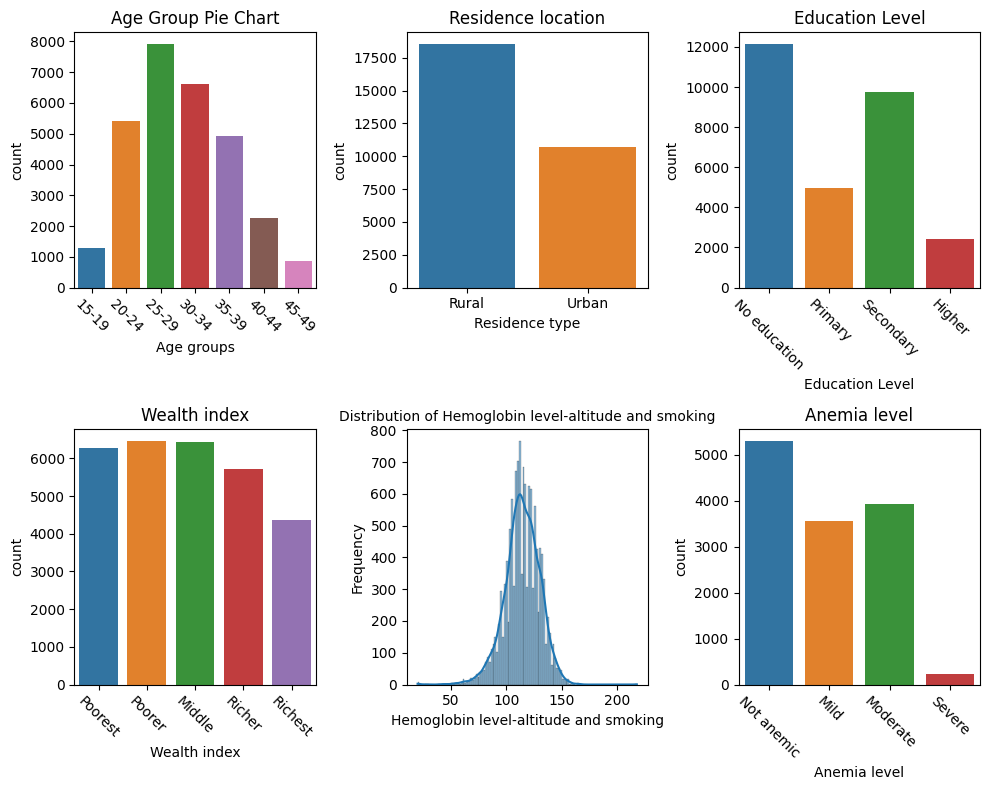

In [2]:
#Explorotory data analysis 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
age_group_counts = df['Age groups'].value_counts()
desired_order = ['15-19','20-24','25-29','30-34','35-39','40-44','45-49']
ax=sns.barplot(y= age_group_counts,x= age_group_counts.index, order=desired_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=-45)
plt.title('Age Group Pie Chart')  

plt.subplot(2,3,2)
Resi_group_counts = df['Residence type'].value_counts()
sns.barplot(y= Resi_group_counts,x= Resi_group_counts.index)
plt.title('Residence location')  


plt.subplot(2,3,3)
Edu_group_counts = df['Education Level'].value_counts()
desired_order_edu = ['No education','Primary','Secondary','Higher']
ax=sns.barplot(y= Edu_group_counts,x= Edu_group_counts.index,order=desired_order_edu)
ax.set_xticklabels(ax.get_xticklabels(),rotation=-45)
plt.title('Education Level')  

plt.subplot(2,3,4)
Weal_group_counts = df['Wealth index'].value_counts()
desired_order_weal =['Poorest','Poorer','Middle','Richer','Richest']
ax=sns.barplot(y= Weal_group_counts,x= Weal_group_counts.index,order=desired_order_weal)
ax.set_xticklabels(ax.get_xticklabels(),rotation=-45)
plt.title('Wealth index')

plt.subplot(2,3,5)
sns.histplot(df['Hemoglobin level-altitude and smoking'],kde=True)
plt.title('Distribution of Hemoglobin level-altitude and smoking', fontsize=10)
plt.xlabel('Hemoglobin level-altitude and smoking')
plt.ylabel('Frequency')

plt.subplot(2,3,6)
Anemia_group_counts = df['Anemia level'].value_counts()
desired_order_ane =['Not anemic','Mild','Moderate','Severe']
ax=sns.barplot(y= Anemia_group_counts,x= Anemia_group_counts.index,order=desired_order_ane)
ax.set_xticklabels(ax.get_xticklabels(),rotation=-45)
plt.title('Anemia level')
plt.tight_layout()
plt.show()
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")


In [3]:
#missing values imputation 
#after initial analysis, only one set of anemia level and hemoglobin level was decided on for further analysis 
df.drop(['Anemia level','Hemoglobin level-altitude and smoking'],axis=1, inplace=True)

df2= df.dropna()

print(df2.info())
df_new=df2.copy()


<class 'pandas.core.frame.DataFrame'>
Index: 5941 entries, 3 to 33922
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age groups                   5941 non-null   object 
 1   Residence type               5941 non-null   object 
 2   Education Level              5941 non-null   object 
 3   Wealth index                 5941 non-null   object 
 4   Births in last five years    5941 non-null   int64  
 5   Age of 1st birth             5941 non-null   int64  
 6   Mosquito net                 5941 non-null   object 
 7   Smokes cigarettes            5941 non-null   object 
 8   Current marital status       5941 non-null   object 
 9   together with partner        5941 non-null   object 
 10  When child put to breast     5941 non-null   object 
 11  Had fever in last two weeks  5941 non-null   object 
 12  Hemoglobin level-altitude    5941 non-null   float64
 13  Anemia level_2        

In [4]:
# Label encoding for categorical columns
categorical_columns = df_new.select_dtypes(include='object').columns

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in categorical_columns:
    df_new[col]=labelencoder.fit_transform(df_new[col])

print(df_new.info())


<class 'pandas.core.frame.DataFrame'>
Index: 5941 entries, 3 to 33922
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age groups                   5941 non-null   int32  
 1   Residence type               5941 non-null   int32  
 2   Education Level              5941 non-null   int32  
 3   Wealth index                 5941 non-null   int32  
 4   Births in last five years    5941 non-null   int64  
 5   Age of 1st birth             5941 non-null   int64  
 6   Mosquito net                 5941 non-null   int32  
 7   Smokes cigarettes            5941 non-null   int32  
 8   Current marital status       5941 non-null   int32  
 9   together with partner        5941 non-null   int32  
 10  When child put to breast     5941 non-null   int32  
 11  Had fever in last two weeks  5941 non-null   int32  
 12  Hemoglobin level-altitude    5941 non-null   float64
 13  Anemia level_2        

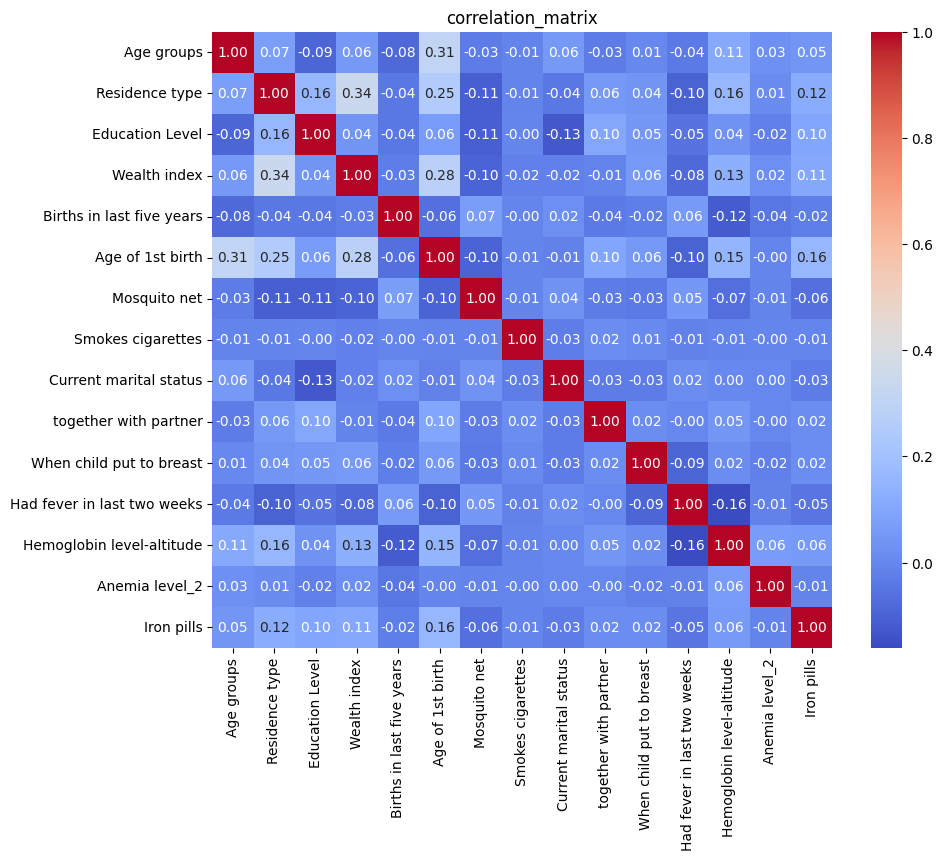

Anemia level_2                 1.000000
Hemoglobin level-altitude      0.063454
Births in last five years      0.044897
Age groups                     0.029671
Wealth index                   0.023566
When child put to breast       0.017536
Education Level                0.016120
Residence type                 0.014187
Had fever in last two weeks    0.011767
Iron pills                     0.008432
Mosquito net                   0.008231
Age of 1st birth               0.004012
Smokes cigarettes              0.004002
Current marital status         0.001889
together with partner          0.001166
Name: Anemia level_2, dtype: float64


In [5]:
#Feature selection
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
correlation_matrix = df_new.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot=True, fmt='.2f',cmap='coolwarm')
plt.title('correlation_matrix')
plt.show()
absolute_correlation_scores=correlation_matrix['Anemia level_2'].abs().sort_values(ascending=False)
print(absolute_correlation_scores)


In [6]:
#Perform the Shapiro-Wilk test for the continuous numerical variable
from scipy import stats
statistic, p_value = stats.shapiro(df_new['Hemoglobin level-altitude'])
print(f"Shapiro-Wilk Statistic: {statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk Statistic: 0.985586404800415
P-value: 3.715187764792668e-24


C:\Users\xiuro\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [7]:
#Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X = df_new.drop(columns=['Anemia level_2'])
y = df_new['Anemia level_2']
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
#Model building and comparision
from lazypredict.Supervised import LazyClassifier
# Create a LazyClassifier
clf = LazyClassifier()
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)


In [9]:
#based the result, choose AdaBoostClassifier for further analysis 
from sklearn.ensemble import AdaBoostClassifier
# Create the AdaBoostClassifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the classifier
ada_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_classifier.predict(X_test)


In [10]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred) # For classification tasks
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(report)

#Get the feature names (column names)
feature_names = X.columns
#Access feature importance using the feature_importances_ attribute of the trained model.
feature_importance = ada_classifier.feature_importances_

feature_imp_df = pd.DataFrame({'feature names':feature_names,'feature importance':feature_importance})
feature_imp_df.sort_values(by='feature importance',ascending=False, inplace=True)
print(feature_imp_df)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       341
           1       1.00      1.00      1.00       496
           2       1.00      1.00      1.00       318
           3       1.00      1.00      1.00        34

    accuracy                           1.00      1189
   macro avg       1.00      1.00      1.00      1189
weighted avg       1.00      1.00      1.00      1189

                  feature names  feature importance
12    Hemoglobin level-altitude                1.00
0                    Age groups                0.00
1                Residence type                0.00
2               Education Level                0.00
3                  Wealth index                0.00
4     Births in last five years                0.00
5              Age of 1st birth                0.00
6                  Mosquito net                0.00
7             Smokes cigarettes                0.00
8        Current marital status

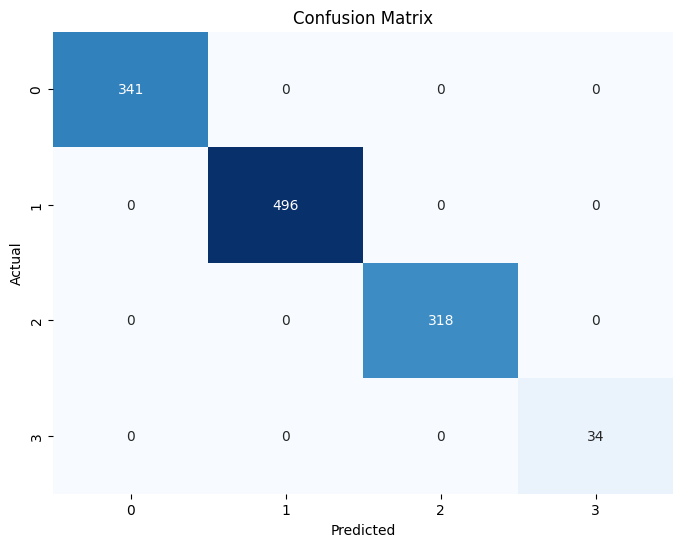

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.metrics import confusion_matrix
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()